In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


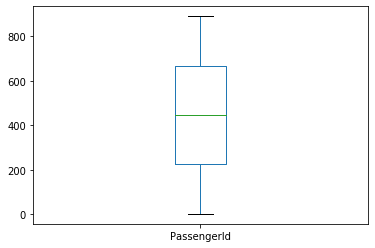

In [9]:
df['PassengerId'].plot.box()

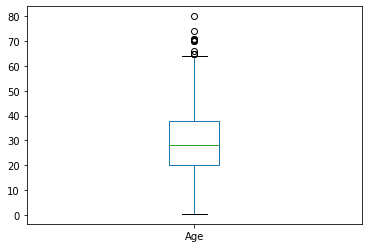

In [10]:
df['Age'].plot.box()

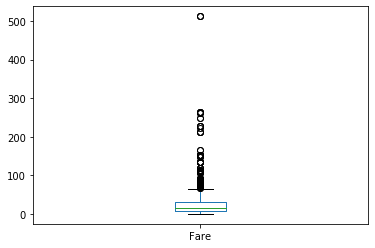

In [11]:
df['Fare'].plot.box()

In [14]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.43279337, 0.47367361,
        0.50244517],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.43279337, 0.47367361,
        0.78684529],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.4745452 , 0.47367361,
        0.48885426],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.43279337, 2.00893337,
        0.17626324],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.4745452 , 0.47367361,
        0.04438104],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.4745452 , 0.47367361,
        0.49237783]])

In [22]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88, 118, 119, 159,
       164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311,
       324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 527, 541, 542,
       557, 567, 610, 638, 678, 679, 683, 686, 689, 700, 716, 730, 736,
       737, 742, 774, 779, 787, 792, 813, 824, 846, 850, 858, 863, 885],
      dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4, 6, 4,
       4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 6, 4, 4, 6, 5, 5, 5, 5,
       6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 5, 6, 4, 4, 4, 4, 4, 4, 5, 4, 5],
      dtype=int64))


In [30]:
z[13][5]

5.73284383018578

In [32]:
d=np.where(z>3)

In [36]:
d.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [26]:
data=df[(z>3).all (axis=1)]

In [28]:
df.shape

(891, 12)

In [29]:
data.shape # Dont Know who to solve it

(0, 12)

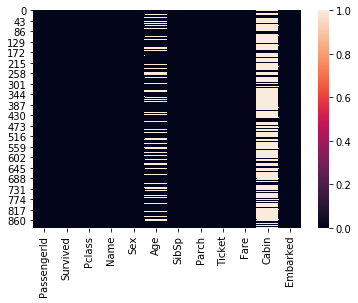

In [37]:
sns.heatmap(df.isnull())

In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
#Basically null values in Cabin column is not impacting any result oriented values in dataset. so i will put these the remain same.

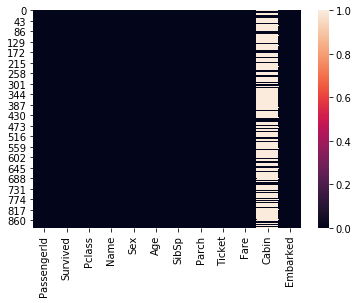

In [43]:
sns.heatmap(df.isnull())

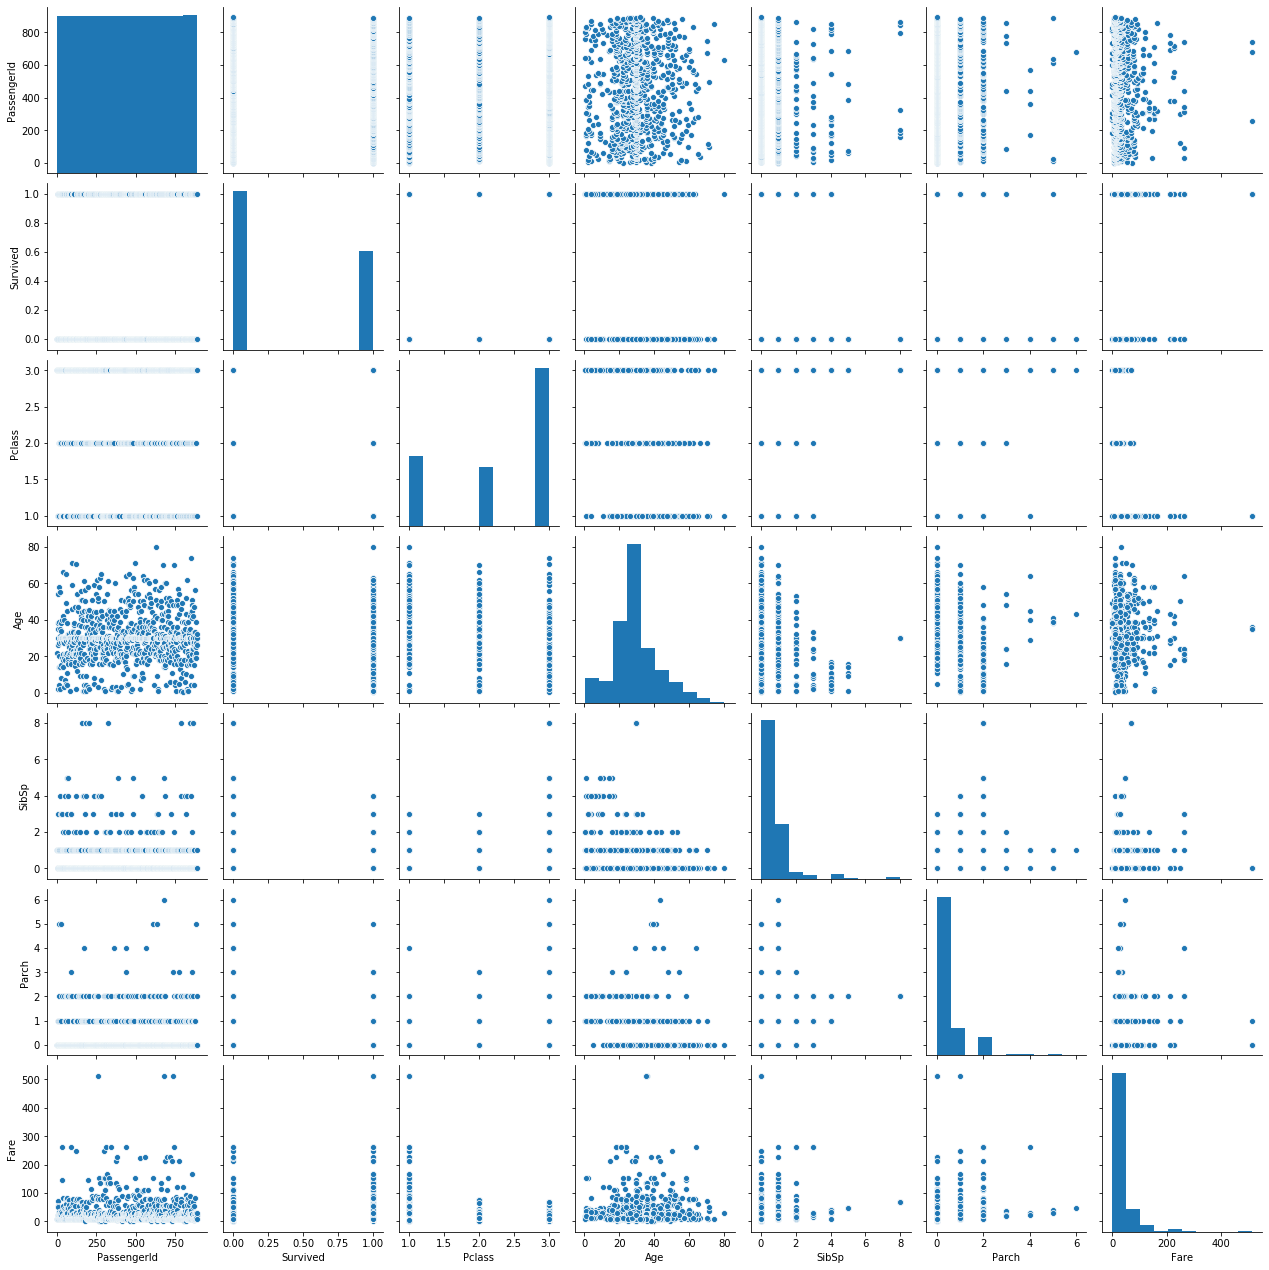

In [44]:
sns.pairplot(df)

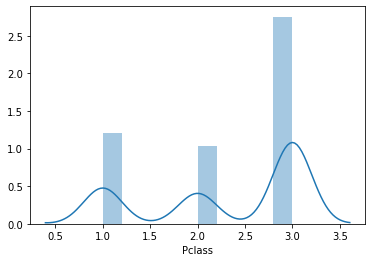

In [45]:
sns.distplot(df['Pclass'])

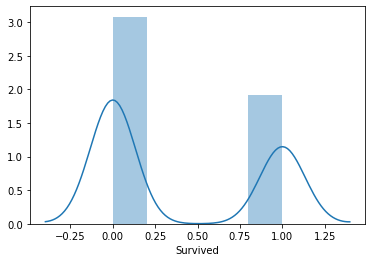

In [46]:
sns.distplot(df['Survived'])

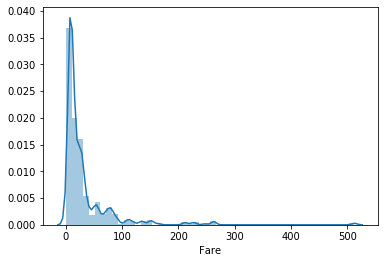

In [47]:
sns.distplot(df['Fare'])

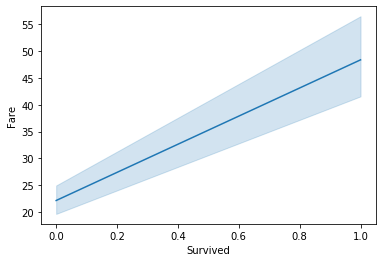

In [49]:
sns.lineplot(x=df['Survived'],y=df['Fare'],data=df)
plt.show()

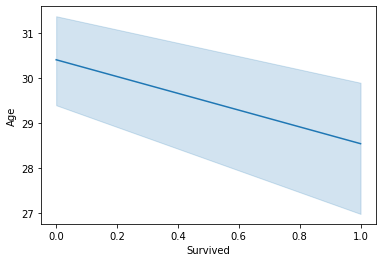

In [50]:
sns.lineplot(x=df['Survived'],y=df['Age'],data=df)
plt.show()

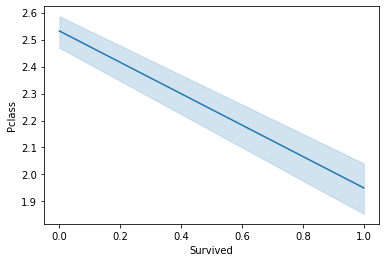

In [51]:
sns.lineplot(x=df['Survived'],y=df['Pclass'],data=df)
plt.show()

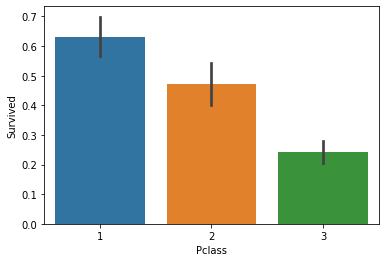

In [52]:
sns.barplot(x=df['Pclass'],y=df['Survived'],data=df)
plt.show()

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # to check the model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split # to split the data (80-20) training & testing part

In [68]:
df.Sex[df.Sex == 'male'] = 1
df.Sex[df.Sex == 'female'] = 2
#df['Sex'] = pd.to_numeric(df['Sex'])
#df['Sex'].value_counts()

In [69]:
x=df.drop(['Survived','Name','Ticket','Cabin','Embarked'], axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.000000,1,0,7.2500
1,2,1,2,38.000000,1,0,71.2833
2,3,3,2,26.000000,0,0,7.9250
3,4,1,2,35.000000,1,0,53.1000
4,5,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000
887,888,1,2,19.000000,0,0,30.0000
888,889,3,2,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [70]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [75]:
model =[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]

In [76]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,predm))
    print('\n confusion_matrix',confusion_matrix(y_test,predm))
    print('\n classification_report',classification_report(y_test,predm))
    print('\n')

accuracy_score 0.8324022346368715

 confusion_matrix [[102  15]
 [ 15  47]]

 classification_report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



accuracy_score 0.6871508379888268

 confusion_matrix [[115   2]
 [ 54   8]]

 classification_report               precision    recall  f1-score   support

           0       0.68      0.98      0.80       117
           1       0.80      0.13      0.22        62

    accuracy                           0.69       179
   macro avg       0.74      0.56      0.51       179
weighted avg       0.72      0.69      0.60       179



accuracy_score 0.6368715083798883

 confusion_matrix [[90 27]
 [38 24]]

 classification_report               precision    recall  f1-score   

In [77]:
# in this DecisionTreeClassifier have the highest accuracy score 83.2

In [78]:
from sklearn.model_selection import cross_val_score

In [81]:
dfc=DecisionTreeClassifier()
dfc.fit(x_train,y_train)
dfc.score(x_train,y_train)
preddfc=dfc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,preddfc))
print('confusion_matrix',confusion_matrix(y_test,preddfc))
print('classification_report',classification_report(y_test,preddfc))

accuracy_score 0.8268156424581006
confusion_matrix [[99 18]
 [13 49]]
classification_report               precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.79      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



In [82]:
dt=DecisionTreeClassifier()
score=cross_val_score(dfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.55865922 0.76966292 0.79775281 0.74157303 0.83146067]
0.7398217312158684
0.09535945214137234


In [83]:
from sklearn.externals import joblib

joblib.dump(dt,'titanic.obj')

['titanic.obj']